In [1]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from AP.Clustering.Main import reduced_data

In [2]:
def load_sonnets(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
        
    sonnets = re.split(r'SONNET \d+\n', content)[1:]  
    # to skip the first empty element
    return [sonnet.strip() for sonnet in sonnets]


In [3]:
sonnets = load_sonnets('sonnets.txt')
print(f"Loaded {len(sonnets)} sonnets")

Loaded 153 sonnets


In [4]:
# so here I initialize the vectorizer to automatically remove stop words and process the text fully
vectorizer = CountVectorizer(stop_words='english')

In [5]:
X = vectorizer.fit_transform(sonnets)
# Now I transform the sonnets into a bag of words model
print(f"Bag of words shake is like that {X.shape}")
# which outputs number of sonnets and number of overall unique words

Bag of words shake is like that (153, 2863)


In [17]:
kmeans = KMeans(n_clusters=4, random_state=None) 
kmeans.fit(X)
# random_state = None means taht each run produces different results

labels = kmeans.labels_ # here I get the labels for each sonnet

for i, label in enumerate(labels):
    print(f"Sonnet {i + 1}: Cluster {label}")
    if i == 10:
        break


Sonnet 1: Cluster 2
Sonnet 2: Cluster 2
Sonnet 3: Cluster 2
Sonnet 4: Cluster 2
Sonnet 5: Cluster 1
Sonnet 6: Cluster 2
Sonnet 7: Cluster 1
Sonnet 8: Cluster 2
Sonnet 9: Cluster 2
Sonnet 10: Cluster 2
Sonnet 11: Cluster 2
Sonnet 12: Cluster 1
Sonnet 13: Cluster 1
Sonnet 14: Cluster 1
Sonnet 15: Cluster 1
Sonnet 16: Cluster 1
Sonnet 17: Cluster 1
Sonnet 18: Cluster 2
Sonnet 19: Cluster 2
Sonnet 20: Cluster 1
Sonnet 21: Cluster 1


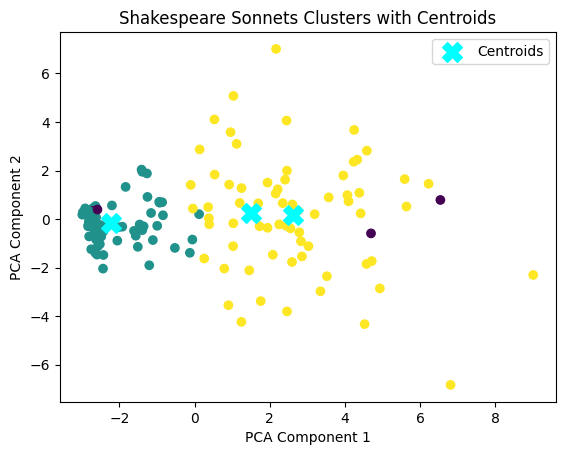

In [15]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')

centroids = kmeans.cluster_centers_

centroid_reduced = pca.transform(centroids)

plt.scatter(centroid_reduced[:, 0], centroid_reduced[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('Shakespeare Sonnets Clusters with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Step 6: Add a legend
plt.legend()

# Show the plot
plt.show()